In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl 

tickers = ['AAPL', 'F', 'AMZN', 'GE', 'TSLA']
pxclose = pd.DataFrame()

for t in tickers:
    pxclose[t] = web.DataReader(t, data_source='yahoo',start='01-01-2020', end='31-05-2021')['Adj Close']

In [2]:

ret_daily = pxclose.pct_change()
ret_annual = ret_daily.mean() * 250
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

In [3]:
p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual)
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

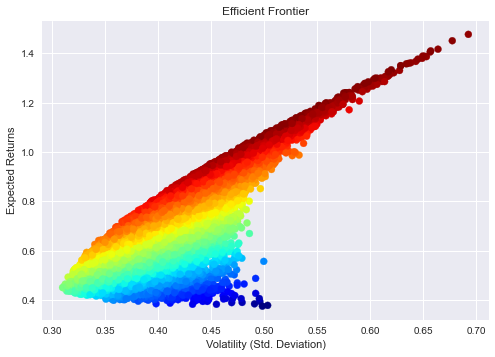

In [4]:

p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [5]:
from scipy.optimize import minimize

def obj_variance(weights, cov):
    return np.sqrt(weights.T @ covmat @ weights)

In [6]:
covmat=cov_daily*250
weights =np.array([0.2, 0.2, 0.2, 0.2, 0.2])
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) 
res = minimize(obj_variance, weights,(covmat), method='SLSQP', bounds=bnds, constraints=cons)

In [7]:

p_returns = []
p_volatility = []
p_weights = []

n_assets = len(tickers)
n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual)
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

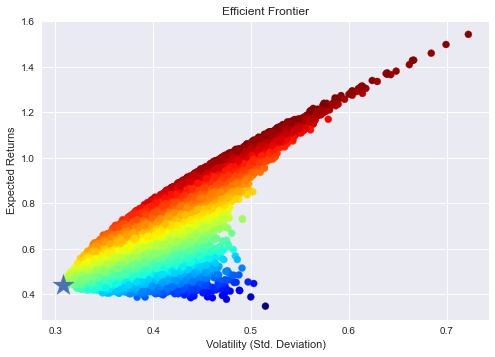

In [8]:

rets = np.sum(ret_daily.mean() * res['x']) * 250
vol = np.sqrt(res['x'].T @ covmat @ res['x'])
p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)
colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.scatter(vol, rets, marker="*", s=500, alpha=1.0)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()